In [34]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download()
# nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pycontractions import Contractions
nltk.download('averaged_perceptron_tagger')
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
# pd.set_option('display.max_rows', None)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [35]:
input_file = 'luxbeauty.json'

In [36]:
with open(input_file) as f:
    lines = f.read().splitlines()

In [37]:
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']
df_inter.head()

,json_element
0,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
1,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
2,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
3,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
4,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."


In [38]:
df_inter['json_element'].apply(json.loads)

0        {'overall': 5.0, 'verified': True, 'reviewTime...
1        {'overall': 5.0, 'verified': True, 'reviewTime...
2        {'overall': 5.0, 'verified': True, 'reviewTime...
3        {'overall': 5.0, 'verified': True, 'reviewTime...
4        {'overall': 5.0, 'verified': True, 'reviewTime...
                               ...                        
34273    {'overall': 4.0, 'verified': False, 'reviewTim...
34274    {'overall': 4.0, 'verified': False, 'reviewTim...
34275    {'overall': 1.0, 'verified': True, 'reviewTime...
34276    {'overall': 5.0, 'verified': False, 'reviewTim...
34277    {'overall': 5.0, 'verified': True, 'reviewTime...
Name: json_element, Length: 34278, dtype: object

In [39]:
lux = pd.json_normalize(df_inter['json_element'].apply(json.loads))
lux.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Size:,...,style.Color:,image,style.Format:,style.Style Name:,style.Style:,style.Scent:,style.Package Quantity:,style.Flavor:,style.Package Type:,style.Scent Name:
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,0.9 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,3.5 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,Amazon Customer,Thanks!!,Five Stars,1489968000,3.5 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,0.9 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
lux.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Size:', 'vote', 'style.Flavor Name:', 'style.Color:', 'image',
       'style.Format:', 'style.Style Name:', 'style.Style:', 'style.Scent:',
       'style.Package Quantity:', 'style.Flavor:', 'style.Package Type:',
       'style.Scent Name:'],
      dtype='object')

In [8]:
lux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34278 entries, 0 to 34277
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   overall                  34278 non-null  float64
 1   verified                 34278 non-null  bool   
 2   reviewTime               34278 non-null  object 
 3   reviewerID               34278 non-null  object 
 4   asin                     34278 non-null  object 
 5   reviewerName             34278 non-null  object 
 6   reviewText               34265 non-null  object 
 7   summary                  34263 non-null  object 
 8   unixReviewTime           34278 non-null  int64  
 9   style.Size:              5634 non-null   object 
 10  vote                     6532 non-null   object 
 11  style.Flavor Name:       20 non-null     object 
 12  style.Color:             9666 non-null   object 
 13  image                    617 non-null    object 
 14  style.Format:         

In [9]:
lux.shape

(34278, 22)

In [10]:
# df_final.describe()

In [41]:
lux.reviewText.isnull().sum()

13

In [42]:
lux = lux.dropna(subset=['reviewText'])
# lux.shape

In [43]:
lux.duplicated(subset=['reviewText']).value_counts()
# lux[lux.duplicated(subset=['reviewText'])]['reviewText']

False    24245
True     10020
dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

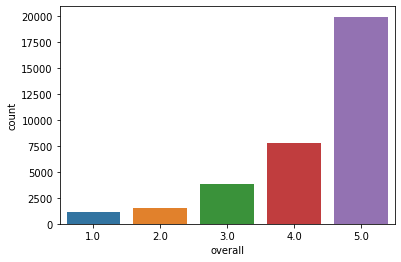

In [44]:
sns.countplot(lux.overall)

In [45]:
lux.reviewText.isnull().sum()

0

In [16]:
lux.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Size:', 'vote', 'style.Flavor Name:', 'style.Color:', 'image',
       'style.Format:', 'style.Style Name:', 'style.Style:', 'style.Scent:',
       'style.Package Quantity:', 'style.Flavor:', 'style.Package Type:',
       'style.Scent Name:'],
      dtype='object')

In [17]:
# lux.summary.nunique()
# lux['overall'] = lux['overall'].astype()

In [18]:
# lux.overall.plot(kind='bar')

In [19]:
lux.shape

(34265, 22)

In [46]:
def remove_punctuation(Text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return Text.translate(translator)
lux['reviewText']=lux['reviewText'].apply(remove_punctuation)

In [21]:
# lux.reviewText.head(25)

In [47]:
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)
len(sw)

179

In [48]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)  
lux['reviewText'] = lux['reviewText'].apply(stopwords)

In [24]:
# lux.reviewText.head(25)

In [25]:
# pip install wordcloud

In [49]:
from wordcloud import WordCloud

In [50]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, 
                      max_words = 1000 , min_font_size = 20).generate(str(lux['reviewText']))

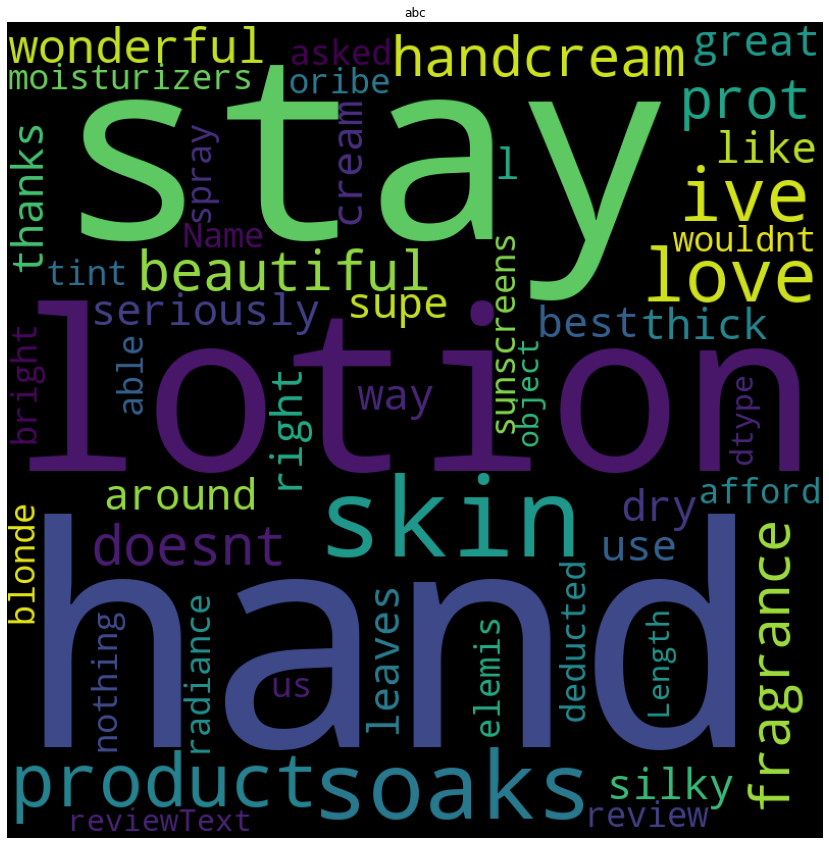

In [51]:
fig = plt.figure(figsize = (30,15), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('abc')
plt.show()

In [52]:
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(lux['reviewText'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items() 

In [53]:
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

<AxesSubplot:>

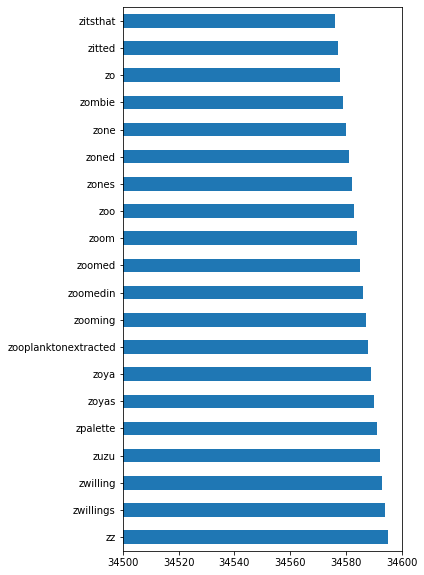

In [54]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10)  , xlim=(34500,34600))
# vocab_bef_stem.head(50)

In [59]:
rat1.shape[0], rat2.shape[0], rat3.shape[0], rat4.shape[0], rat5.shape[0], 

(1095, 1496, 3880, 7831, 19963)

In [ ]:
# stemmer = SnowballStemmer("english")
# def stemming(text):    
#     '''a function which stems each word in the given text'''
#     text = [stemmer.stem(word) for word in text.split()]
#     return " ".join(text) 
# lux['reviewText'] = lux['reviewText'].apply(stemming)
# # lux.reviewText.head()

In [60]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
lux['length'] = lux['reviewText'].apply(length)
lux.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Size:,...,image,style.Format:,style.Style Name:,style.Style:,style.Scent:,style.Package Quantity:,style.Flavor:,style.Package Type:,style.Scent Name:,length
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,DB,handcream beautiful fragrance doesnt stay prot...,Beautiful Fragrance,1515110400,0.9 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,Ajaey,wonderful hand lotion seriously dry skin stays...,wonderful hand lotion,1491350400,3.5 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,D. Jones,best hand cream around silky thick soaks way l...,Best hand cream around,1490572800,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,Amazon Customer,thanks,Five Stars,1489968000,3.5 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,D. Jones,great hand lotion soaks right leaves skin supe...,Great hand lotion!,1488240000,0.9 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79
5,5.0,True,"02 25, 2017",A1606LA683WZZU,B00004U9V2,Amr,great product doesnt leave hands feeling greas...,Five Stars,1487980800,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
6,5.0,True,"02 25, 2017",A1606LA683WZZU,B00004U9V2,Amr,great product doesnt leave hands feeling greas...,Five Stars,1487980800,3.5 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
7,5.0,True,"01 30, 2017",A1606LA683WZZU,B00004U9V2,Amr,described arrived time,Five Stars,1485734400,0.9 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
8,4.0,False,"01 24, 2017",A1YY53NQXFKMRN,B00004U9V2,Trixie,nice lightweight hand cream summer,"Smells good, absorbs quickly",1485216000,3.5 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
9,5.0,True,"12 1, 2016",A3R0NQ9E53JHYQ,B00004U9V2,T. Hooth,best hand cream ever,Five Stars,1480550400,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20


In [57]:
rat1 = lux[lux['overall'] == 1.0]
rat2 = lux[lux['overall'] == 2.0]
rat3 = lux[lux['overall'] == 3.0]
rat4 = lux[lux['overall'] == 4.0]
rat5 = lux[lux['overall'] == 5.0]

In [ ]:
# rat1.shape[0] + rat2.shape[0]+rat3.shape[0]+rat4.shape[0] + rat5.shape[0] 

In [61]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
bins = 500
plt.hist(rat1['length'], alpha = 1,color='b', bins=bins, label='rat1')
plt.hist(rat2['length'], alpha = 0.4, bins=bins, label='rat2')
plt.hist(rat3['length'], alpha = 0.4, bins=bins, label='rat3')
plt.hist(rat4['length'], alpha = 0.4, bins=bins, label='rat4')
plt.hist(rat5['length'], alpha = 0.4, bins=bins, label='rat5')

plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

KeyError: 'length'

C:\Users\Jalal\AppData\Local\New folder\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


<AxesSubplot:>

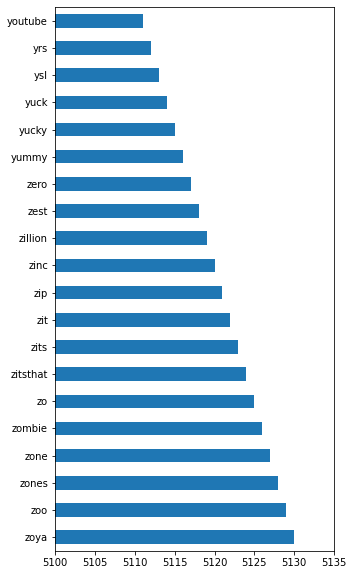

In [62]:
# create the object of tfid vectorizer
rat1_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
rat1_tfid_vectorizer.fit(rat1['reviewText'])
# collect the vocabulary items used in the vectorizer
rat1_dictionary = rat1_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in rat1_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
rat1_vocab = pd.Series(count, index=vocab)
# sort the dataframe
rat1_vocab = rat1_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = rat1_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5100, 5135))

<AxesSubplot:>

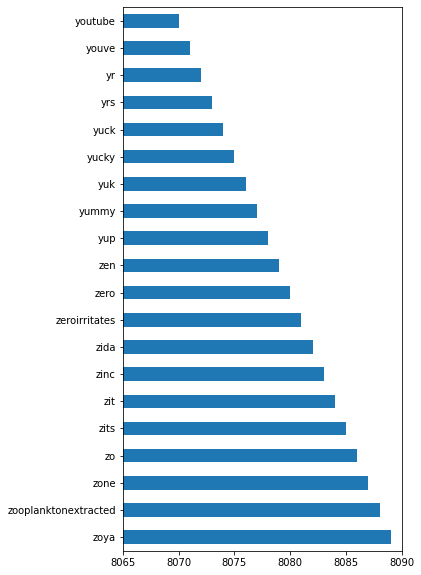

In [63]:
# create the object of tfid vectorizer
rat2_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
rat2_tfid_vectorizer.fit(rat2['reviewText'])
# collect the vocabulary items used in the vectorizer
rat2_dictionary = rat2_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in rat2_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
rat2_vocab = pd.Series(count, index=vocab)
# sort the dataframe
rat2_vocab = rat2_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = rat2_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (8065, 8090))

<AxesSubplot:>

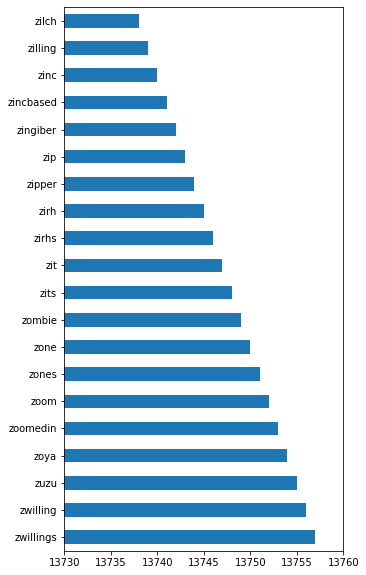

In [64]:
# create the object of tfid vectorizer
rat3_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
rat3_tfid_vectorizer.fit(rat3['reviewText'])
# collect the vocabulary items used in the vectorizer
rat3_dictionary = rat3_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in rat3_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
rat3_vocab = pd.Series(count, index=vocab)
# sort the dataframe
rat3_vocab = rat3_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = rat3_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (13730, 13760))

<AxesSubplot:>

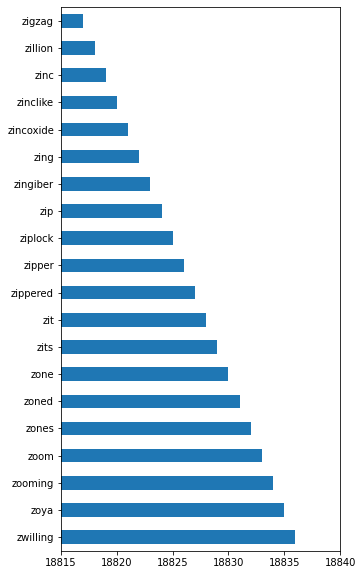

In [65]:
# create the object of tfid vectorizer
rat4_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
rat4_tfid_vectorizer.fit(rat4['reviewText'])
# collect the vocabulary items used in the vectorizer
rat4_dictionary = rat4_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in rat4_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
rat4_vocab = pd.Series(count, index=vocab)
# sort the dataframe
rat4_vocab = rat4_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = rat4_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (18815, 18840))

<AxesSubplot:>

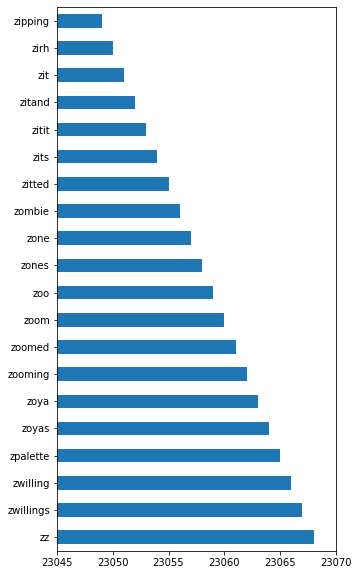

In [66]:
 #create the object of tfid vectorizer
rat5_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
rat5_tfid_vectorizer.fit(rat5['reviewText'])
# collect the vocabulary items used in the vectorizer
rat5_dictionary = rat5_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in rat5_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
rat5_vocab = pd.Series(count, index=vocab)
# sort the dataframe
rat5_vocab = rat5_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = rat5_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (23045, 23070))

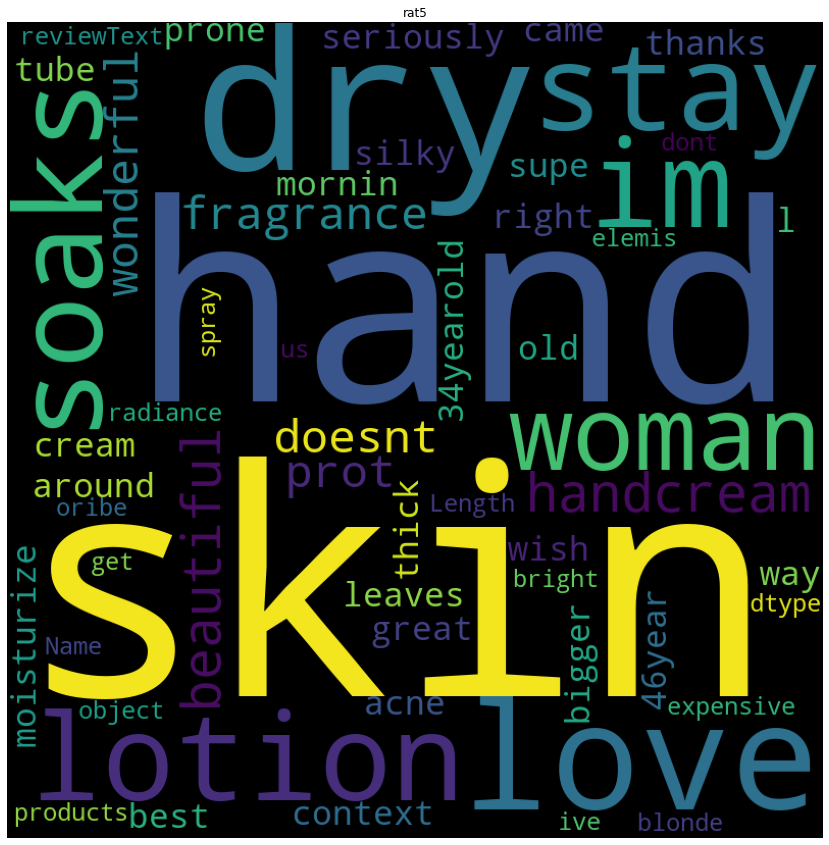

In [67]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(rat5['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (30,15), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('rat5')
plt.show()

In [ ]:
# rat5_vocab.head(20)

In [ ]:
# lux1 = lux[lux["overall"] != 3.0] # need datatype=object
# lux1["label"] = lux1["overall"].apply(lambda rating : +1 if rating > 3.0 else -1)

In [ ]:
# from sklearn.model_selection import train_test_split

# X = pd.DataFrame(lux1, columns = ["reviewText"])
# y = pd.DataFrame(lux1, columns = ["label"])

# x_train,x_test,y_train, y_test  = train_test_split(X, y,test_size=0.2)

In [ ]:
# from sklearn.datasets import fetch_20newsgroupsdata = fetch_20newsgroups()
# data.target_names
# data.target_names
# type(data)

In [ ]:
# model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
# model.fit(x_train, y_train)

In [ ]:
# X.shape, y.shape

In [ ]:
# train_X.shape, train_y.shape, test_X.shape, test_y.shape

In [ ]:
# lux.columns

In [ ]:
# pip install -U textblob
python -m textblob.download_corpora

In [68]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("This is a good example of a TextBlob")
# print(blob)
blob.sentiment
#Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [69]:
blob = TextBlob("This is a good example of a TextBlob", analyzer = NaiveBayesAnalyzer())
blob.sentiment.classification
# blob.sentiment[2]

'neg'

In [75]:
from textblob.sentiments import NaiveBayesAnalyzer
reviewText_blob = [TextBlob(text, analyzer = NaiveBayesAnalyzer()) for text in lux['reviewText']]
lux['classification'] = [b.sentiment.classification for b in reviewText_blob]

KeyboardInterrupt: 

In [ ]:
lux.head(20)

In [70]:
#load the descriptions into textblob
reviewText_blob = [TextBlob(text) for text in lux['reviewText']]
#add the sentiment metrics to the dataframe
lux['tb_Pol'] = [b.sentiment.polarity for b in reviewText_blob]
lux['tb_Subj'] = [b.sentiment.subjectivity for b in reviewText_blob]
#show dataframe
lux.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Size:,...,style.Style Name:,style.Style:,style.Scent:,style.Package Quantity:,style.Flavor:,style.Package Type:,style.Scent Name:,length,tb_Pol,tb_Subj
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,DB,handcream beautiful fragrance doesnt stay prot...,Beautiful Fragrance,1515110400,0.9 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,0.300000,0.700000
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,Ajaey,wonderful hand lotion seriously dry skin stays...,wonderful hand lotion,1491350400,3.5 oz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,0.271250,0.620000
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,D. Jones,best hand cream around silky thick soaks way l...,Best hand cream around,1490572800,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,0.283333,0.447917


In [112]:
subj_mean

0.56

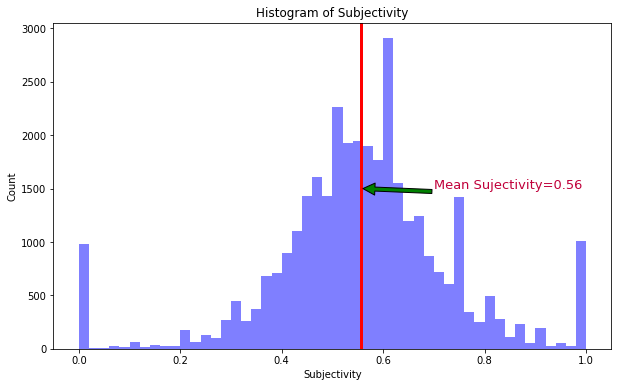

In [123]:
num_bins = 50
subj_mean = round(lux.tb_Subj.mean(),2)

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(lux.tb_Subj, num_bins, facecolor='blue', alpha=0.5)
plt.axvline(lux.tb_Subj.mean(), color='red', linewidth=3)
plt.annotate(f'Mean Sujectivity={subj_mean}',fontsize=13,xy=(0.56,1500),xytext = (0.7, 1500), color='#c0003a',arrowprops = {'facecolor' : 'green'})
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show();


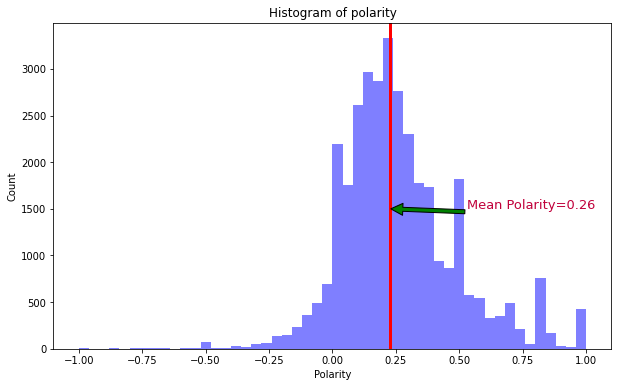

In [122]:
num_bins = 50
pol_mean = round(lux.tb_Pol.mean(),2)

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(lux.tb_Pol, num_bins, facecolor='blue', alpha=0.5)
plt.axvline(lux.tb_Pol.median(), color='red', linewidth=3)
plt.annotate(f'Mean Polarity={pol_mean}',fontsize=13,xy=(0.23,1500),xytext = (0.53, 1500), color='#c0003a',arrowprops = {'facecolor' : 'green'})
# plt.xticks(list(range(-1,1,50)))
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [120]:
pol_mean = round(lux.tb_Pol.mean(),2)
pol_mean

0.26

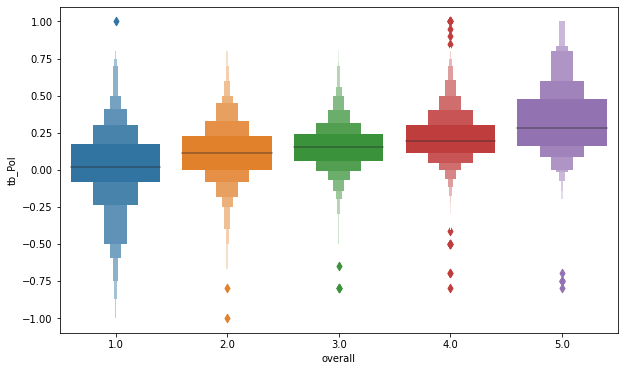

In [73]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='overall', y='tb_Pol', data=lux)
plt.show()